In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Case a

##Engergy calculater
def Ha(Lattice, pool, J=1):
    spins = Lattice
    neighbours = np.roll(spins,-1)
    interactions = spins*neighbours
    return -J*np.sum(interactions)

def dHa(N, Lattice, pool, i, J=1):
    spins = Lattice
    l = (i-1)%N
    u = (i+1)%N
    return 2 * J * ( spins[l] + spins[u])*spins[i]

# Case b
##Same constants

def generate_neighbors(N):
    tries = 0
    while True:
        tries += 1
        pool = np.random.permutation(N)
        nxt  = np.roll(pool, -1)
        #ring neighbors are exactly distance 1 mod N in either direction
        diff = (pool - nxt) % N
        if not np.any((diff == 1) | (diff == N - 1)):
            return pool, tries
    return pool, c

##Engergy calculater
def Hb(Lattice, pool, J=1):
    spins = Lattice
    neighbors1 = np.roll(spins,-1)
    neighbors2 = np.roll(pool,-1)

    interactions1 = spins*neighbors1
    interactions2 = pool*neighbors2
    return -J*(np.sum(interactions1) + np.sum(interactions2))

def dHb(N, Lattice, pool, i, J=1):
    spins = Lattice
    j = np.where(pool == i)[0]
    l = int((i-1)%N)
    u = int((i+1)%N)
    return 2 * J * (( spins[l] + spins[u] + spins[int(pool[(j-1)%N])] + spins[int(pool[(j+1)%N])])*spins[i])

def simulation(N, n, n0, T, style = "A"):
    if style == "A":
        H = Ha
        dH = dHa
        pool = []
    else:
        H = Hb
        dH = dHb
        pool, c = generate_neighbors(N)

    lat = np.random.choice([-1,1],N)
    s_list = np.zeros(n)
    H_list = np.zeros(n)
    s_list[0] = np.abs(np.sum(lat))
    H_list[0] = H(lat, pool,J=1)
    for i in range(1,n):
        k = np.random.randint(N)
        r = np.random.uniform()
        dE = dH(N, lat, pool, k, J=1)
        P = np.exp(-dE/T)
        if dE <= 0 or P <= r:
            lat[k] = -1*lat[k]
            s_list[i] = s_list[i-1] - 2*lat[k]
            H_list[i] = H_list[i-1] + dE
        else:
            s_list[i] = s_list[i-1]
            H_list[i] = H_list[i-1]
    return np.mean(s_list[int(n0):]), np.mean(H_list[int(n0):])


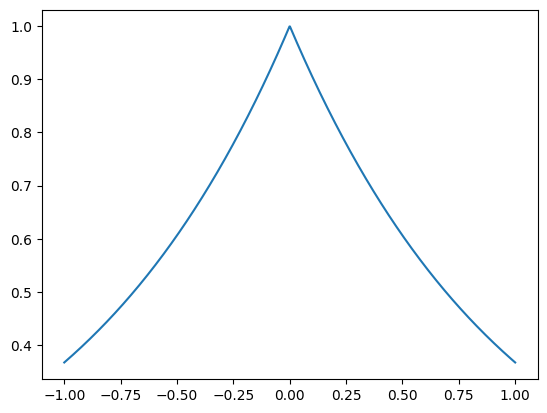

In [41]:
def func(x):
    return np.exp(-abs(x))

X = np.linspace(-1,1,1000)
Y = func(X)
plt.plot(X,Y)

In [37]:
T = np.linspace(1/10000,10,100)
Sa_avg = np.zeros(100)
Ha_avg = np.zeros(100)
Sb_avg = np.zeros(100)
Hb_avg = np.zeros(100)
for i, t in enumerate(T):
    Sa_avg[i], Ha_avg[i] = simulation(100, 10000, int(10000/4), t, style = "A")
    Sb_avg[i], Hb_avg[i] = simulation(100, 10000, int(10000/4), t, style = "B")
    if i%10 == 0:
        print(i/100, "% done")


C:\Users\lucq0\AppData\Local\Temp\ipykernel_25140\1200223964.py:67: RuntimeWarning: overflow encountered in exp
  P = np.exp(-dE/T)
C:\Users\lucq0\AppData\Local\Temp\ipykernel_25140\1200223964.py:46: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return 2 * J * (( spins[l] + spins[u] + spins[int(pool[(j-1)%N])] + spins[int(pool[(j+1)%N])])*spins[i])


0.0 % done
0.1 % done
0.2 % done
0.3 % done
0.4 % done
0.5 % done
0.6 % done
0.7 % done
0.8 % done
0.9 % done


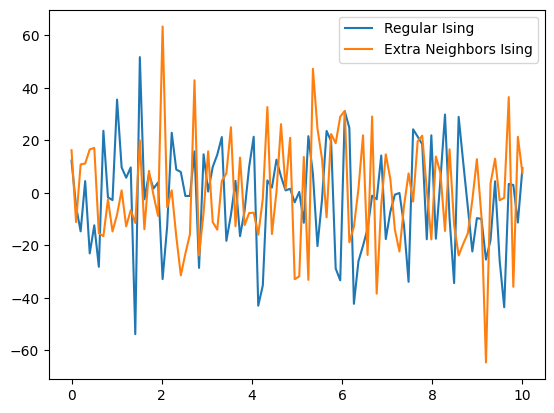

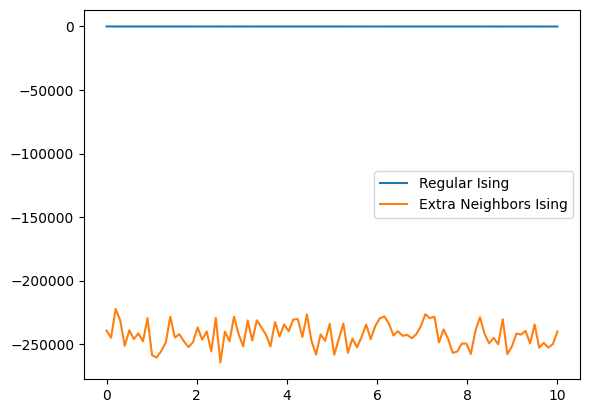

In [40]:
plt.plot(T, Sa_avg, label = "Regular Ising")
plt.plot(T, Sb_avg, label = "Extra Neighbors Ising")
plt.legend()
plt.show()
plt.plot(T, Ha_avg, label = "Regular Ising")
plt.plot(T, Hb_avg, label = "Extra Neighbors Ising")
plt.legend()
plt.show()

In [121]:
c_list = np.zeros(1)
for i in range(1):
    pool, c = generate_neighbors2(int(1e7))
    c_list[i] = c
print(np.mean(c_list))

16.0


C:\Users\lucq0\AppData\Local\Temp\ipykernel_22372\1124484642.py:2: RuntimeWarning: divide by zero encountered in divide
  return((1-2/x)**x)
C:\Users\lucq0\AppData\Local\Temp\ipykernel_22372\1124484642.py:2: RuntimeWarning: invalid value encountered in power
  return((1-2/x)**x)


(0.1343352832366127, 0.1363352832366127)

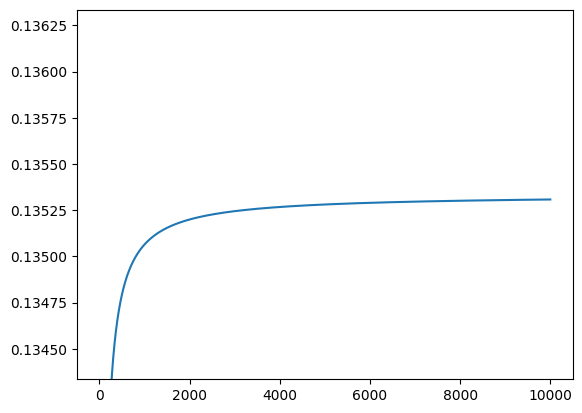

In [ ]:
#Filler earlier functions
def remove_one_occurrence(pool, val):
    pos = np.where(pool == val)[0][0]  # first occurrence
    return np.delete(pool, pos)

def generate_neighbors(N, tries=10):

    while True:
        # initialize
        neighbors = [{(i - 1) % N, (i + 1) % N} for i in range(N)]
        # pool of candidates for neighbors
        pool = np.arange(N)

        attempt_failed = False

        for i in range(N):
            #What we must not pick
            forbidden = neighbors[i] | {i}

            need = 1

            while need > 0:
                #currently allowed values from the pool
                allowed_mask = ~np.isin(pool, list(forbidden))
                allowed_vals = np.unique(pool[allowed_mask])

                if allowed_vals.size < 1:
                    #dead end for this attempt so restart whole run
                    attempt_failed = True
                    break

                # pick one new neighbor (change size=need and remove multiple occurrences if you want batch)
                choice = rng.choice(allowed_vals, size=1, replace=False)[0]

                # update neighbors (i <- choice)
                neighbors[i].add(int(choice))

                neighbors[int(choice)].add(i)

                # update constraints so we dont pick the same again
                forbidden.add(int(choice))
                #update pool
                pool = remove_one_occurrence(pool, choice)

                need -= 1

            if attempt_failed:
                break  # break the for i in range(N) loop

        if not attempt_failed:
            # success!
            return neighbors, pool

        # otherwise loop to next attempt

    # if we get here, all attempts failed
    print(neighbors)
    print(pool)
    raise RuntimeError(f"Failed to construct neighbors after {tries} attempts.")